# Walk on Mars data

In [1]:
%matplotlib notebook

import obspy
import os
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from facvae.utils import datadir

## Read

In [2]:
# Paths to raw Mars waveforms and the scattering covariance thereof.
MARS_PATH = datadir('mars')
MARS_RAW_PATH = datadir(os.path.join(MARS_PATH, 'raw'))

stream_1 = obspy.read(os.path.join(MARS_RAW_PATH, "2019", "JUN", "06/06.UVW.mseed"))
stream_2 = obspy.read(os.path.join(MARS_RAW_PATH, "2019", "JUN", "06/06.UVW_calib_ACC.mseed"))

## Explore

In [3]:
stream_2[0].stats

         network: XB
         station: ELYSE
        location: 02
         channel: BHU
       starttime: 2019-06-06T00:00:00.048000Z
         endtime: 2019-06-07T00:00:00.098000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1728002
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'R', 'number_of_records': 30316, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 46565376})

<IPython.core.display.Javascript object>


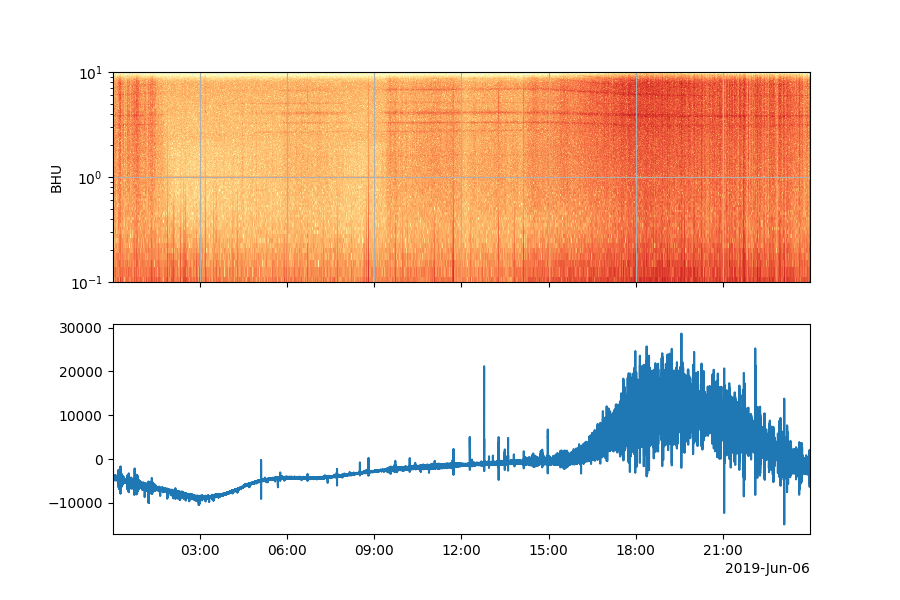

<IPython.core.display.Javascript object>


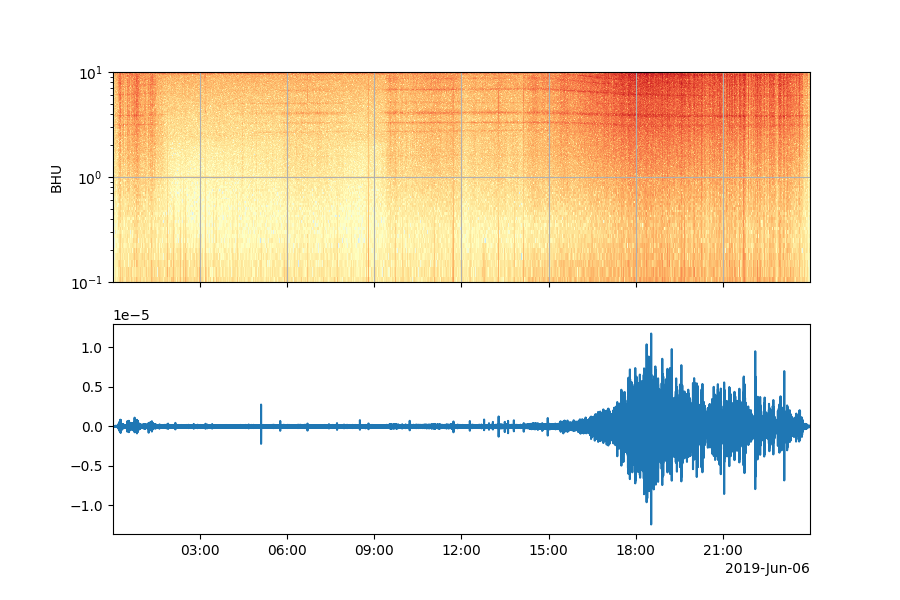

In [13]:
CHANNEL = 0
STREAMS = [stream_1.copy(), stream_2.copy()]
WINDOW_DURATION_SEC = 40
plt.close()
for index, stream in enumerate(STREAMS):

    # stream.filter(type="highpass", freq=2)

    data = [trace.data for trace in stream]
    times = [trace.times("matplotlib") for trace in stream]
    channels = [trace.stats.channel for trace in stream]

    sampling_rate = stream[0].stats.sampling_rate
    nperseg = int(WINDOW_DURATION_SEC * sampling_rate)
    noverlap = nperseg // 16

    fig, ax = plt.subplots(2, figsize=(9, 6), sharex=True, num=index, clear=True)

    frequency, t, s = spectrogram(data[0], fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)
    ax[0].set_ylim(0.1, sampling_rate / 2)
    ax[0].pcolormesh(t / 24 / 3600 + times[0][0], frequency, np.log(np.abs(s)), cmap="RdYlBu_r", 
                     vmin=np.log(np.abs(s)).min() * 1.2, vmax=np.log(np.abs(s)).max() * 0.99)
    ax[0].grid()
    ax[0].set_ylabel(channels[0])
    ax[0].set_ylim(0.1, sampling_rate / 2)
    ax[0].set_yscale("log")

    xticks = mdates.AutoDateLocator()
    xticklabels = mdates.ConciseDateFormatter(xticks)
    ax[0].xaxis.set_major_locator(xticks)
    ax[0].xaxis.set_major_formatter(xticklabels)

    ax[-1].plot(times[0], data[0])

    plt.show()

/tmp/ipykernel_40060/3271185178.py:4: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


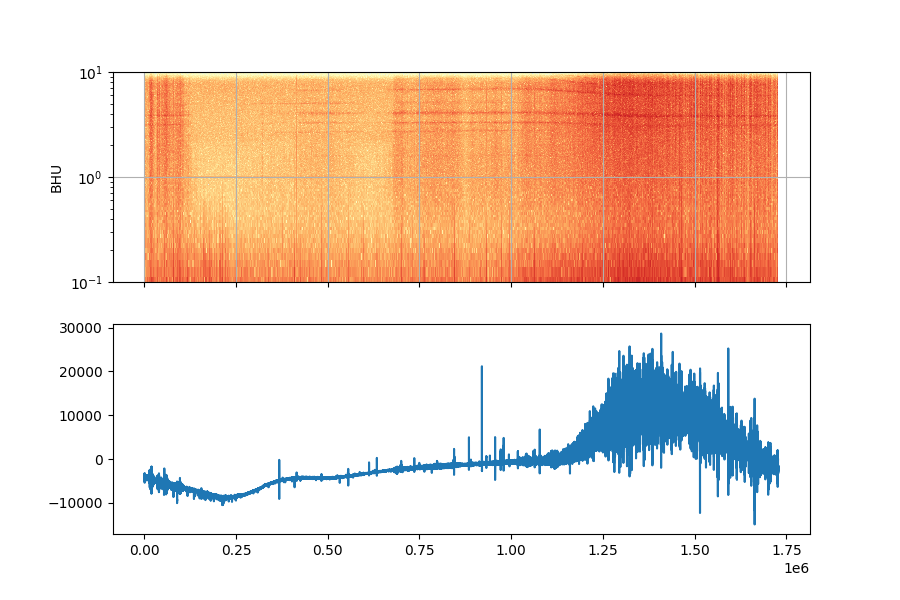

<IPython.core.display.Javascript object>


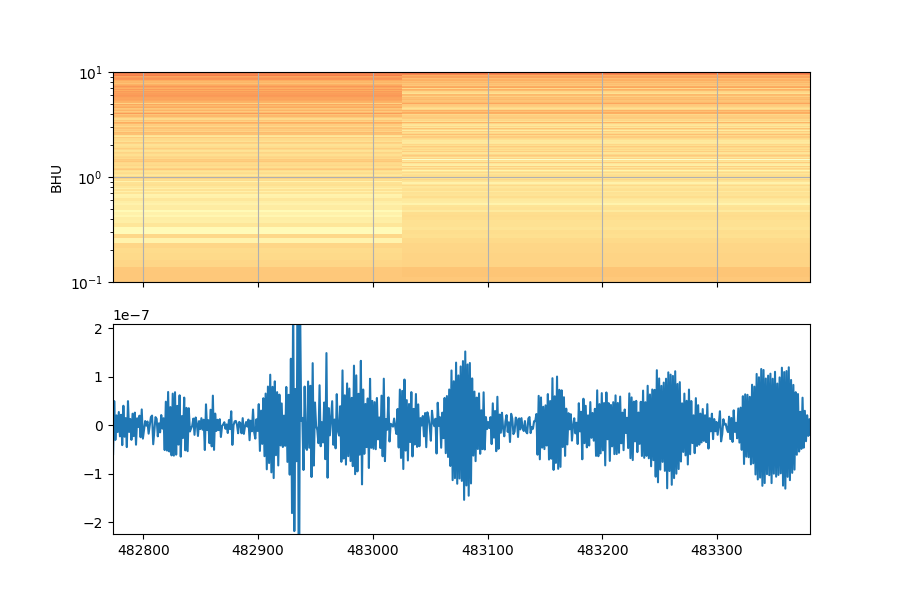

In [86]:
CHANNEL = 0
STREAMS = [stream_1.copy(), stream_2.copy()]
WINDOW_DURATION_SEC = 40
plt.close()
for index, stream in enumerate(STREAMS):

    # stream.filter(type="highpass", freq=2)

    data = [trace.data for trace in stream]
    times = [trace.times("matplotlib") for trace in stream]
    channels = [trace.stats.channel for trace in stream]

    sampling_rate = stream[0].stats.sampling_rate
    nperseg = int(WINDOW_DURATION_SEC * sampling_rate)
    noverlap = nperseg // 16

    fig, ax = plt.subplots(2, figsize=(9, 6), sharex=True, num=index, clear=True)

    frequency, t, s = spectrogram(data[0], fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)
    ax[0].set_ylim(0.1, sampling_rate / 2)
    ax[0].pcolormesh((t / 24 / 3600)*len(data[0]), frequency, np.log(np.abs(s)), cmap="RdYlBu_r", 
                     vmin=np.log(np.abs(s)).min() * 1.2, vmax=np.log(np.abs(s)).max() * 0.99)
    ax[0].grid()
    ax[0].set_ylabel(channels[0])
    ax[0].set_ylim(0.1, sampling_rate / 2)
    ax[0].set_yscale("log")

    ax[-1].plot((times[0] - times[0][0])*len(data[0]), data[0])

    plt.show()

In [87]:
trace = stream_2[0][425000:480000]
n = stream_2[0][482800:482800+2048]

In [83]:
def windows(x, window_size, stride, offset):
    """ Separate x into windows on last axis, discard any residual.
    """
    num_window = int((x.shape[-1] - window_size - offset) // stride + 1)
    windowed_x = np.stack([
        x[..., i * stride + offset:window_size + i * stride + offset]
        for i in range(num_window)
    ], -2)  # (C) x nb_w x w

    return windowed_x


In [84]:
a = windows(trace, 2048, 1024, 0)

In [88]:
n= n.reshape(1, 2048)